In [2]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np

In [3]:
#загрузка обучающего набора данных
train = pd.read_csv('C:/Users/Ира/Documents/pract/train.csv')

In [4]:
#вывод тренировочного набора данных 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Первичный анализ данных

In [5]:
#общая информация о данной выборке
print(train.info())

#по данным видно, что есть строки с пропущенным значением возраста. Мало у кого есть информация о Cabin. 
#Пропущенные значения в Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
#проанализируем данные каждого столбца на возможные выбросы
#Первое: в поле PassengerId количество различных значений должно быть равно размеру таблицы, то есть 891 (выполняется)
len(train['PassengerId'].unique())

891

In [7]:
#в поле Survived должны быть только 0 и 1 (выполняется)
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
#в поле Pclass должны быть только цифры 1, 2 или 3 (выполняется)
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
#поле Sex может принимать только два значения Male, Female (выполняется)
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
#проверим поле Age (чтобы не было отрицательных значений, например)
#для этого построим график распределения по возрасту
train.Age.describe()
#видно, что минимальное значение не меньше 0, а максимальное = 80. 
#Таким образом, данные не вышли за рамки адекватного диапазона

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
#проверим поля SibSp и Parch аналогичным выше образом (в пределах допустимых значений)
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
#проверим поле Embarked (должно принимать 3 значения) (выполняется)
train.Embarked.value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

# Графики

Графики для представления данных

In [14]:
#импорт необходимых библиотек 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly
#import plotly.graph_objs as go

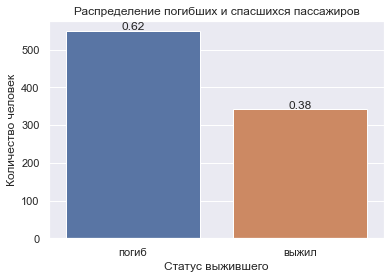

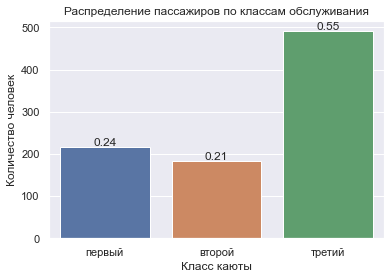

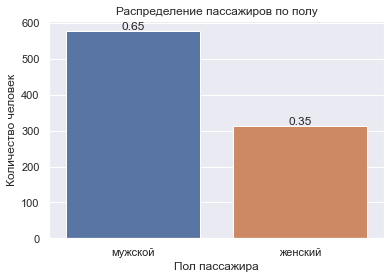

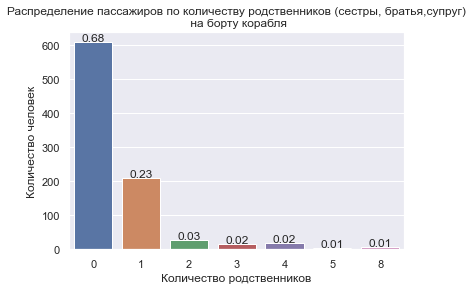

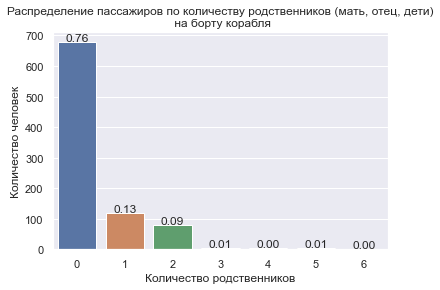

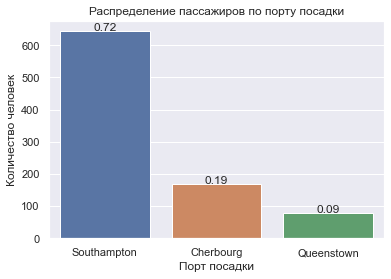

In [15]:
sns.set(style="darkgrid")
# Построение графиков
#plt.figure(figsize=(9, 9))
#plt.subplot(2, 1, 1)

#график распределения погибших и выживших пассажиров
pylab.figure(1)
g = sns.countplot(x= 'Survived', data = train)
plt.xticks((0,1), ['погиб', 'выжил'])
g.set_title("Распределение погибших и спасшихся пассажиров")
plt.ylabel("Количество человек")
plt.xlabel("Статус выжившего")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center")
    
#график распределения пассажирам по классам обслуживания (каютам)
pylab.figure(2)
g = sns.countplot(x= 'Pclass', data = train)
plt.xticks((0,1,2), ['первый', 'второй', 'третий'])
g.set_title("Распределение пассажиров по классам обслуживания")
plt.ylabel("Количество человек")
plt.xlabel("Класс каюты")


total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 

#график распределения по половому признаку
pylab.figure(3)
g = sns.countplot(x= 'Sex', data = train)
plt.xticks((0,1), ['мужской', 'женский'])
g.set_title("Распределение пассажиров по полу")
plt.ylabel("Количество человек")
plt.xlabel("Пол пассажира")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 
    
#график распределения по количеству родственников на борту "второго порядка"
pylab.figure(4)
g = sns.countplot(x= 'SibSp', data = train)
g.set_title("Распределение пассажиров по количеству родственников (сестры, братья,супруг)\n на борту корабля")
plt.ylabel("Количество человек")
plt.xlabel("Количество родственников")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 
    
#график распределения по количеству родственников "первого порядка"
pylab.figure(5)
g = sns.countplot(x= 'Parch', data = train)
g.set_title("Распределение пассажиров по количеству родственников (мать, отец, дети)\n на борту корабля")
plt.ylabel("Количество человек")
plt.xlabel("Количество родственников")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 
    
#график распределения по портам отправления
pylab.figure(6)
g = sns.countplot(x= 'Embarked', data = train)
g.set_title("Распределение пассажиров по порту посадки")
plt.xticks((0,1,2), ['Southampton', 'Cherbourg', 'Queenstown'])
plt.ylabel("Количество человек")
plt.xlabel("Порт посадки")


total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 

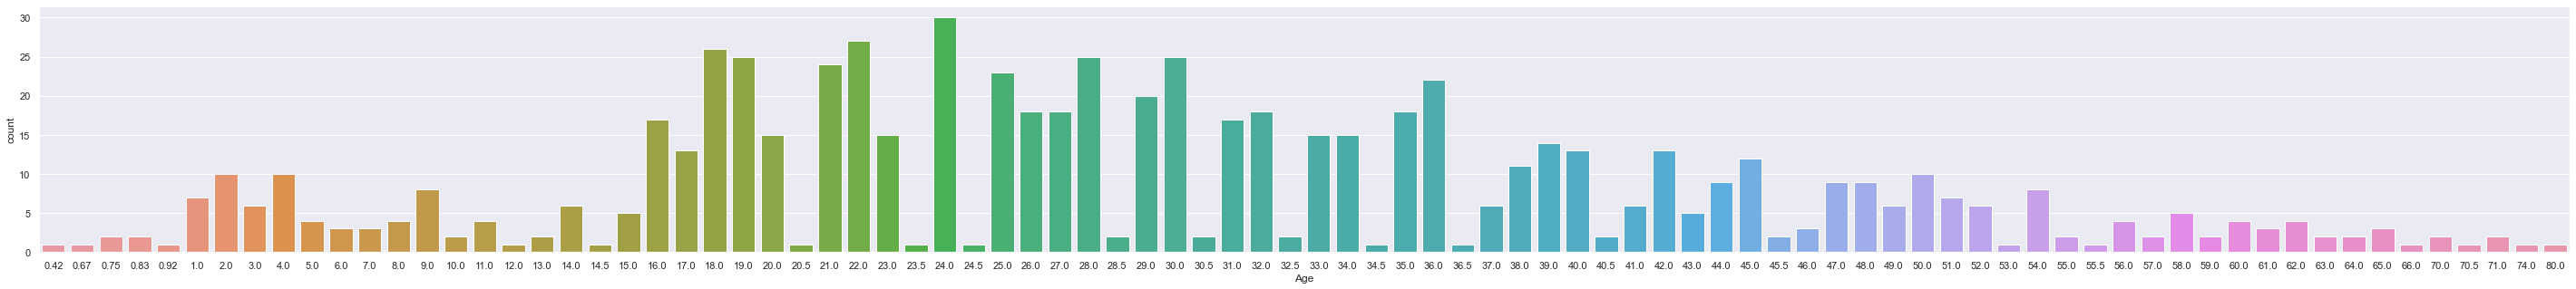

In [16]:
plt.figure(figsize=(50,5))
g = sns.countplot(x = 'Age', data = train)

Text(0.5, 0, 'Возраст пассажира')

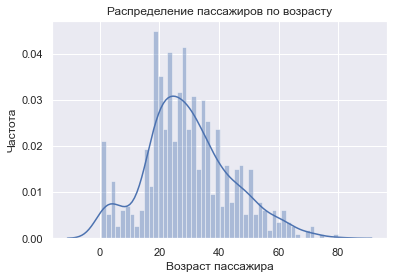

In [17]:
#построим распределение по возрасту (существующее, то есть без пропущенны значений)
#сделаем копию данного датасета
train2 = train['Age'].copy()
train2 = train2.dropna()
g = sns.distplot(train2, bins = 50)
g.set_title("Распределение пассажиров по возрасту")
plt.ylabel("Частота")
plt.xlabel("Возраст пассажира")


Text(0.5, 0, 'Цена билета')

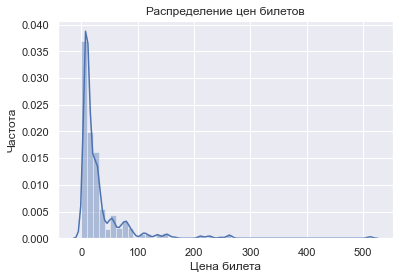

In [18]:
#построим график распредления цены билетов
g = sns.distplot(train.Fare, bins = 50)
g.set_title("Распределение цен билетов")
plt.ylabel("Частота")
plt.xlabel("Цена билета")

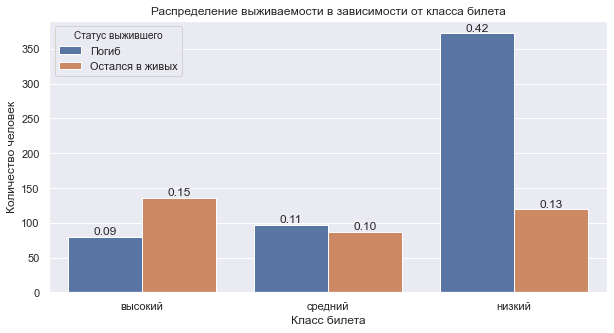

In [19]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
g = sns.countplot(x= 'Pclass', hue= 'Survived', data = train)
plt.xticks((0,1,2), ['высокий', 'средний', 'низкий'])
g.set_title("Распределение выживаемости в зависимости от класса билета")
plt.xlabel("Класс билета")
plt.ylabel("Количество человек")
legend = g.get_legend()
legend.set_title("Статус выжившего")
labs = legend.texts
labs[0].set_text("Погиб")
labs[1].set_text("Остался в живых")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 

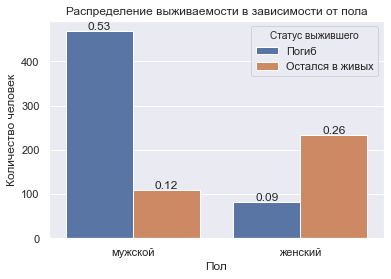

In [20]:
g = sns.countplot(x= 'Sex', hue= 'Survived', data = train)
plt.xticks((0,1), ['мужской', 'женский'])
g.set_title("Распределение выживаемости в зависимости от пола")
plt.xlabel("Пол")
plt.ylabel("Количество человек")
legend = g.get_legend()
legend.set_title("Статус выжившего")
labs = legend.texts
labs[0].set_text("Погиб")
labs[1].set_text("Остался в живых")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 

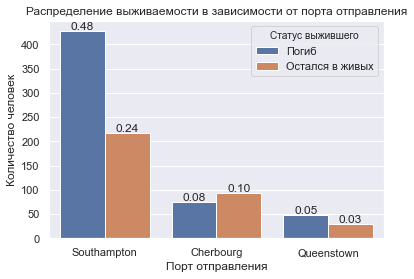

In [21]:
#рассмотрим распределение выживших по порту, из которого происходило отправление
g = sns.countplot(x= 'Embarked', hue= 'Survived', data = train)
plt.xticks((0,1,2), ['Southampton', 'Cherbourg', 'Queenstown'])
g.set_title("Распределение выживаемости в зависимости от порта отправления")
plt.xlabel("Порт отправления")
plt.ylabel("Количество человек")
legend = g.get_legend()
legend.set_title("Статус выжившего")
labs = legend.texts
labs[0].set_text("Погиб")
labs[1].set_text("Остался в живых")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 
    
#странно. По графику вроде бы получается прямая зависимость между тем, из какого порта было отправление, и шансами выжить
#посмотрим. Возможно такой график связан с особым распределением классов кают
#из какого-то порта больше отправилось пассажиров, у которых был высокий класс каюты

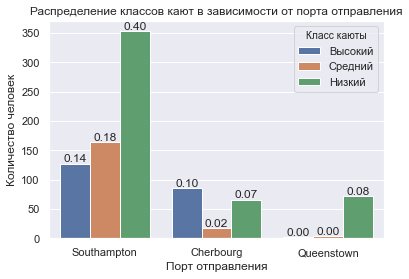

In [22]:
g = sns.countplot(x= 'Embarked', hue= 'Pclass', data = train)
plt.xticks((0,1,2), ['Southampton', 'Cherbourg', 'Queenstown'])
g.set_title("Распределение классов кают в зависимости от порта отправления")
plt.xlabel("Порт отправления")
plt.ylabel("Количество человек")
legend = g.get_legend()
legend.set_title("Класс каюты")
labs = legend.texts
labs[0].set_text("Высокий")
labs[1].set_text("Средний")
labs[2].set_text("Низкий")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 
#предположение выше подтвердилось

Text(0, 0.5, 'Возраст')

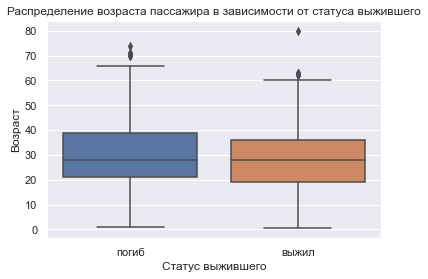

In [23]:
#теперь логично предположить, что больше шансов было выжить у молодых людей. У них больше сил, здоровья.
#Построим график, чтобы понять верность этой гипотезы
g = sns.boxplot(y= "Age", x= "Survived", data = train)
plt.xticks((0,1), ['погиб', 'выжил'])
g.set_title("Распределение возраста пассажира в зависимости от статуса выжившего")
plt.xlabel("Статус выжившего")
plt.ylabel("Возраст")

#какой-то прямой зависимости не прослеживается

# Подготовка данных к анализу

In [24]:
#замена пропущенных значений в данных Embarked на самый распространенный порт
train['Embarked'].fillna('S', inplace = True)
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Разные способы замены пропущенных значений в графе возраст (Age)

In [25]:
#просто на самое распространенное значение 

In [26]:
#на среднее по возрасту (отдельно посчитанное для мужчин и женщин)

In [27]:
#другой способ
train.head()
#в имени есть гоноратив, поэтому по нему можно более узко выделить группы для вычисления среднего возраста. 
#для того, чтобы использовать это создадим новый признак Gonorativ

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train3 = train.copy()
train3['Gonorativ'] = [x[1][0:x[1].find('.')] for x in train3['Name'].str.split(',')]  
train3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gonorativ
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [29]:
train3['Gonorativ'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [30]:
#объединим гоноратив в группы 
train3.loc[train3['Gonorativ'].isin([" Capt", " Col", " Don", " Dr", 
                               " Jonkheer", " Lady", " Major", " Rev", " Sir", " the Countess", " Dona"]), 'Gonorativ'] = " Aristokrat"
train3.loc[train3['Gonorativ'] ==  " Ms", 'Gonorativ'] = " Mrs"
train3.loc[train3['Gonorativ'].isin([" Mlle", " Mme"]), 'Gonorativ'] = " Miss"

train3['Gonorativ'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Aristokrat'], dtype=object)

In [37]:
train3.query('Gonorativ == " Mr" and Age != Age')['PassengerId'].count()

119

In [38]:
#посмотрим теперь количество пропущенных значений по возрасту по полученным группам
def f_NA(x):
    return train3.query('Gonorativ == @x and Age != Age')['PassengerId'].count()
df = pd.DataFrame({'Gonorativ': train3['Gonorativ'].unique()})
df['Count_NA'] = df['Gonorativ'].apply(lambda x: f_NA(x))
df['Sredn'] = train3.groupby('Gonorativ')['Age'].transform('mean')
df

,Gonorativ,Count_NA,Sredn
0,Mr,119,32.368090
1,Mrs,17,35.825688
2,Miss,36,21.818792
3,Master,4,35.825688
4,Aristokrat,1,32.368090


In [31]:
train3['Age'].fillna(train3.groupby('Gonorativ')['Age'].transform('mean'), inplace=True)
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Gonorativ    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [34]:
#признак Fare (есть билеты с нулевой стоимостью)
train3['Fare'].value_counts() #и их 15
#возможно это дети (?)
train3.loc[train3['Fare'] == 0, 'Fare'] = np.nan
train3.query('Fare != Fare') #нет не дети. Здесь есть возраст 36, 40...Поэтому также заменим средним значением по классам Гоноратива

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gonorativ
179,180,0,3,"Leonard, Mr. Lionel",male,36.00000,0,0,LINE,NaN,NaN,S,Mr
263,264,0,1,"Harrison, Mr. William",male,40.00000,0,0,112059,NaN,B94,S,Mr
271,272,1,3,"Tornquist, Mr. William Henry",male,25.00000,0,0,LINE,NaN,NaN,S,Mr
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,32.36809,0,0,239853,NaN,NaN,S,Mr
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00000,0,0,LINE,NaN,NaN,S,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,32.36809,0,0,239853,NaN,NaN,S,Mr
466,467,0,2,"Campbell, Mr. William",male,32.36809,0,0,239853,NaN,NaN,S,Mr
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,32.36809,0,0,239854,NaN,NaN,S,Mr
597,598,0,3,"Johnson, Mr. Alfred",male,49.00000,0,0,LINE,NaN,NaN,S,Mr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,32.36809,0,0,112052,NaN,NaN,S,Mr


In [40]:
train3['Fare'].fillna(train3.groupby('Gonorativ')['Fare'].transform('mean'), inplace=True)
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Gonorativ    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gonorativ


Text(0, 0.5, 'Возраст')

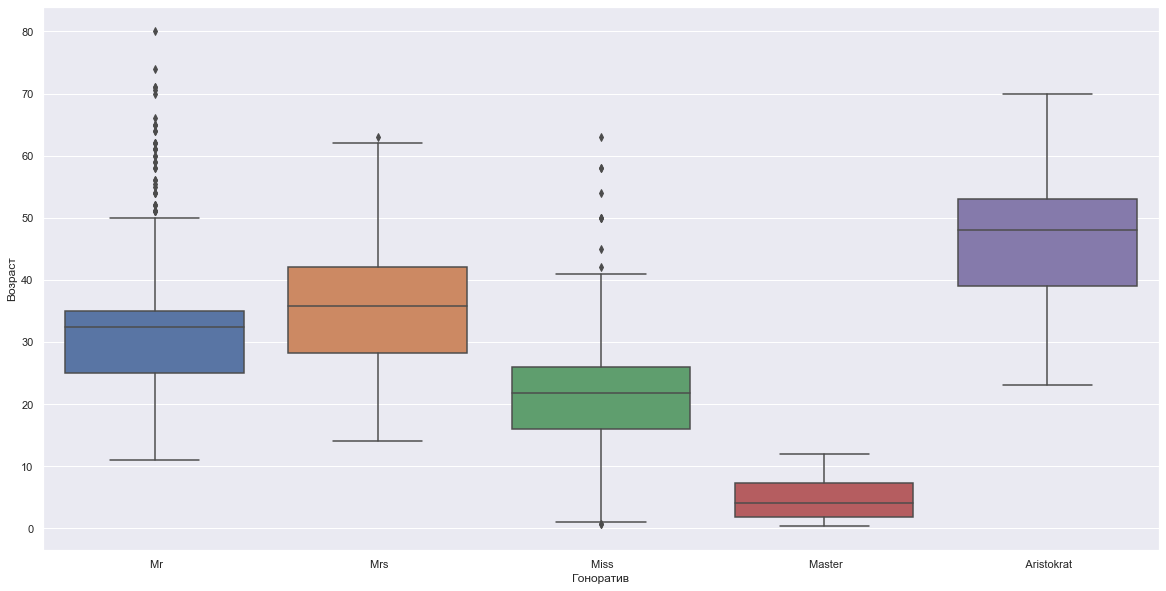

In [41]:
#поле гоноратив дает нам дополнительную информацию о возрасте, знатности..
plt.figure(figsize=(20,10))
g = sns.boxplot(y = "Age", x= "Gonorativ", data = train3)
#plt.xticks((0,1,2), ['первый', 'второй', 'третий'])
#g.set_title("Распределение возраста пассажира в зависимости от класса каюты")
plt.xlabel("Гоноратив")
plt.ylabel("Возраст")

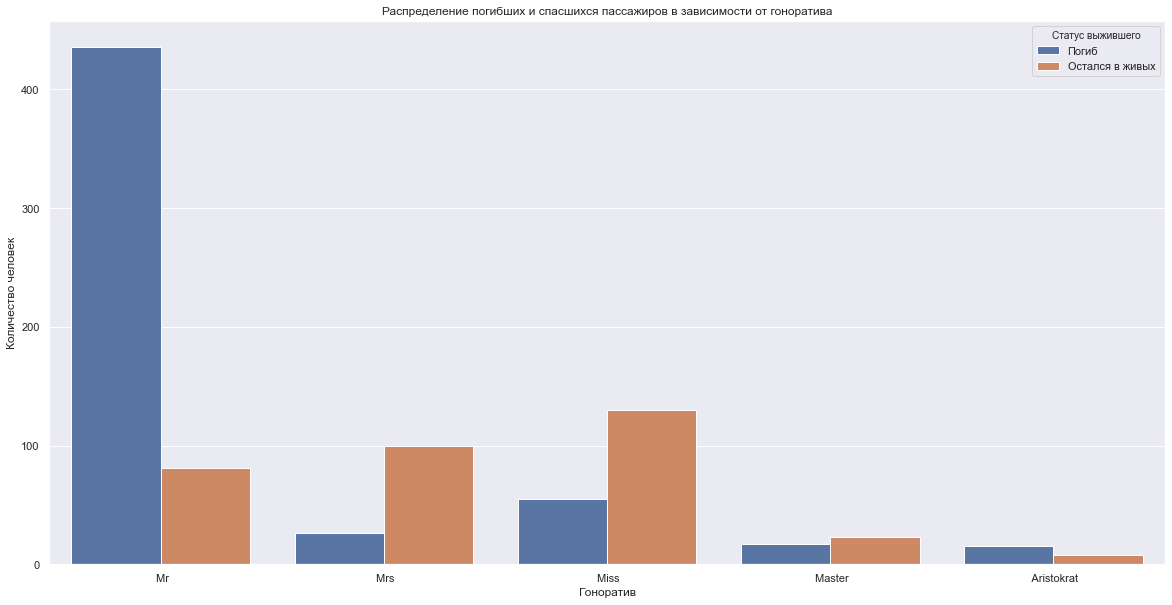

In [42]:
#посмотрим на шанс выжить по полученному полю гоноратива
plt.figure(figsize=(20,10))
g = sns.countplot(x = 'Gonorativ', data = train3, hue = 'Survived')
#plt.xticks((0,1), ['погиб', 'выжил'])
g.set_title("Распределение погибших и спасшихся пассажиров в зависимости от гоноратива")
plt.ylabel("Количество человек")
plt.xlabel("Гоноратив")
legend = g.get_legend()
legend.set_title("Статус выжившего")
labs = legend.texts
labs[0].set_text("Погиб")
labs[1].set_text("Остался в живых")


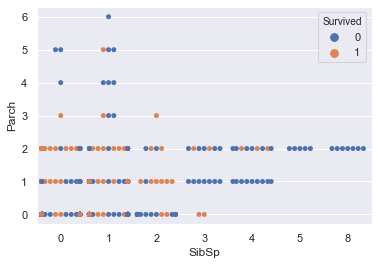

In [45]:
plt.figure(figsize=(10,10))
#Теперь посмотрим на информацию, которую можно получить из количества родственников на корабле.
g = sns.swarmplot(
    x = "SibSp",
    y = "Parch",
    data = train3,
    hue = 'Survived')  # Очень похоже, что на выживаемость отрицательно влияет как отсутствие родственников, так и большое из количество.
g.set_title("Распределение выживаемости в зависимости от количество родственников на борту")
plt.xlabel("Количество родственников (сестер, братьев...)")
plt.ylabel("Количество рощдственников (отец, мать...)")
legend = g.get_legend()
legend.set_title("Статус выжившего")
labs = legend.texts
labs[0].set_text("Погиб")
labs[1].set_text("Остался в живых")

In [ ]:
train3['Count_f'] = train3['Parch'] + train3['SibSp'] # новая переменная - количество родственников на корабле

In [ ]:
plt.figure(figsize=(20,10))
g = sns.countplot(x= 'Count_f', hue= 'Survived', data = train3)
g.set_title("Распределение выживаемости в зависимости от количество родственников на борту")
plt.xlabel("Количество родственников")
plt.ylabel("Количество человек")
legend = g.get_legend()
legend.set_title("Статус выжившего")
labs = legend.texts
labs[0].set_text("Погиб")
labs[1].set_text("Остался в живых")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 

In [47]:
#наличие номера кабины
train3['Is_Cab'] = 0
train3['Is_Cab'] = np.where(pd.notna(train3['Cabin']), 1, 0)
train3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gonorativ,Is_Cab
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S,Mr,0
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.458300,NaN,Q,Mr,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S,Mr,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,NaN,S,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,NaN,S,Mrs,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,NaN,C,Mrs,0


In [ ]:
#посмотрим, как влияет новый признак на целевую переменную
g = sns.countplot(x = 'Is_Cab', hue = 'Survived', data = train3)
g.set_title("Распределение выживаемости в зависимости от наличия номера кабины")
plt.xticks((0,1), ['Нет номера', 'Есть номер'])
plt.xlabel("Наличие номера кабины")
plt.ylabel("Количество людей")
legend = g.get_legend()
legend.set_title("Статус выжившего")
labs = legend.texts
labs[0].set_text("Погиб")
labs[1].set_text("Остался в живых")

total = float(len(train)) 
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2f}'.format(height/total),ha="center") 

# Построение модели

In [49]:
#удаляем ненужные столбцы и кодируем текстовые значения в других столбцах на цифры
train3 = train3.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gonorativ,Is_Cab
0,0,3,male,22.000000,1,0,7.250000,S,Mr,0
1,1,1,female,38.000000,1,0,71.283300,C,Mrs,1
2,1,3,female,26.000000,0,0,7.925000,S,Miss,0
3,1,1,female,35.000000,1,0,53.100000,S,Mrs,1
4,0,3,male,35.000000,0,0,8.050000,S,Mr,0
5,0,3,male,32.368090,0,0,8.458300,Q,Mr,0
6,0,1,male,54.000000,0,0,51.862500,S,Mr,1
7,0,3,male,2.000000,3,1,21.075000,S,Master,0
8,1,3,female,27.000000,0,2,11.133300,S,Mrs,0
9,1,2,female,14.000000,1,0,30.070800,C,Mrs,0


In [50]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(train3.Sex.drop_duplicates()) #задаем список значений для кодирования
dicts['Sex'] = list(label.classes_)
train3.Sex = label.transform(train3.Sex) #заменяем значения из списка кодами закодированных элементов 

label.fit(train3.Embarked.drop_duplicates())
dicts['Embarked'] = list(label.classes_)
train3.Embarked = label.transform(train3.Embarked)

label.fit(train3.Gonorativ.drop_duplicates())
dicts['Gonorativ'] = list(label.classes_)
train3.Gonorativ = label.transform(train3.Gonorativ)


In [51]:
dicts

{'Sex': ['female', 'male'],
 'Embarked': ['C', 'Q', 'S'],
 'Gonorativ': [' Aristokrat', ' Master', ' Miss', ' Mr', ' Mrs']}

In [52]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import pylab as pl

In [53]:
target = train3.Survived
train = train3.drop(['Survived'], axis=1) #из исходных данных убираем Id пассажира и флаг спасся он или нет
kfold = 5 #количество подвыборок для валидации
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов


In [54]:
ROCtrainTRN, ROCtestTRN, ROCtrainTRG, ROCtestTRG = train_test_split(train, target, test_size=0.25) 

In [247]:
#здесь уже найденные оптимальные параметры
model_rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True, max_depth = 10, max_features = 0.5, min_samples_leaf = 1, n_estimators = 109) #в параметре передаем кол-во деревьев
model_knc = KNeighborsClassifier(n_neighbors = 5) #в параметре передаем кол-во соседей
model_lr = LogisticRegression(penalty='l1', C = 1) 
model_svc = svm.SVC(C = 2, degree = 1) #по умолчанию kernek='rbf'

In [ ]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y = target
X = train

print("KFold")
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

In [ ]:
#лучшие параметры для метода опорных векторов
parameters = {'C': [1, 2, 3, 3.2, 3.5, 3.7, 4], 'degree': range(1, 50)}
svc_grid = GridSearchCV(model_svc, parameters, n_jobs=-1, cv=skf, verbose=1)
svc_grid.fit(X, y)
svc_grid.best_params_, svc_grid.best_score_

In [ ]:
#лучшие параметры для метода ближайших соседей
knn_params = {'n_neighbors': range(1, 50)}
knn = GridSearchCV(model_knc, knn_params, cv = skf, n_jobs = -1, verbose=True)
knn.fit(X, y)
knn.best_params_, knn.best_score_

In [ ]:
#лучшие параметры для логистической регрессии
c_values = np.logspace(-2, 3, 500)
logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X, y)

In [ ]:
C_param_range = np.logspace(-2, 3, 500)
train_sepal_scores, test_sepal_scores = validation_curve(estimator=model_lr
                                                            ,X=X
                                                            ,y=y
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            )
train_sepal_mean = np.mean(train_sepal_scores,axis=1)
train_sepal_std = np.std(train_sepal_scores,axis=1)
test_sepal_mean = np.mean(test_sepal_scores,axis=1)
test_sepal_std = np.std(test_sepal_scores,axis=1)

In [ ]:
g = plt.figure(figsize=(20,10))
plt.plot(C_param_range
            ,train_sepal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_sepal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
plt.xlim([0, 5])

In [ ]:
# лучшие параметры для случайного леса
parameters = {'max_features': [0.1, 0.25, 0.5, 0.75], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20], 'n_estimators': range(1, 300) }
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)
gcv.best_params_, gcv.best_score_

In [248]:
scores = cross_val_score(model_rfc, train, target, cv = kfold)
itog_val['RandomForestClassifier'] = scores.mean()
scores = cross_val_score(model_knc, train, target, cv = kfold)
itog_val['KNeighborsClassifier'] = scores.mean()
scores = cross_val_score(model_lr, train, target, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()
scores = cross_val_score(model_svc, train, target, cv = kfold)
itog_val['SVC'] = scores.mean()
itog_val

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklea

{'RandomForestClassifier': 0.8260982123827084,
 'KNeighborsClassifier': 0.7195500227499452,
 'LogisticRegression': 0.7935072400858646,
 'SVC': 0.7115900598165747}

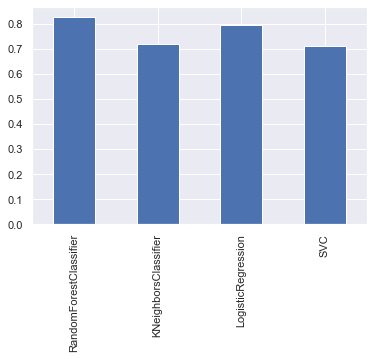

In [249]:
pd.DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

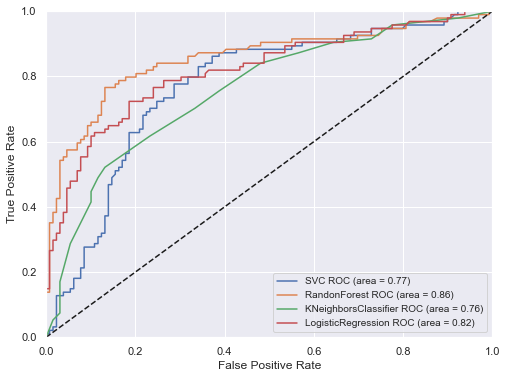

In [250]:
pl.clf()
plt.figure(figsize=(8,6))
#SVC
model_svc.probability = True
probas = model_svc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('SVC', roc_auc))
#RandomForestClassifier
probas = model_rfc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',roc_auc))
#KNeighborsClassifier
probas = model_knc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))
#LogisticRegression
probas = model_lr.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()

# Применение модели к тестовому набору данных

In [ ]:
#считываем тестовый набор данных
test = pd.read_csv('C:/Users/Ира/Documents/pract/test(1).csv')
test

In [ ]:
test['Gonorativ'] = [x[1][0:x[1].find('.')] for x in test['Name'].str.split(',')]

In [60]:
#объединим гоноратив в группы 

test.loc[test['Gonorativ'].isin([" Capt", " Col", " Don", " Dr", 
                               " Jonkheer", " Lady", " Major", " Rev", " Sir", " the Countess", " Dona"]), 'Gonorativ'] = " Aristokrat"
test.loc[test['Gonorativ'] ==  " Ms", 'Gonorativ'] = " Mrs"
test.loc[test['Gonorativ'].isin([" Mlle", " Mme"]), 'Gonorativ'] = " Miss"

test['Gonorativ'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Aristokrat'], dtype=object)

In [61]:
#замена пропущенных значений в данных Embarked на самый распространенный порт
test['Embarked'].fillna('S', inplace = True)

test['Age'].fillna(test.groupby('Gonorativ')['Age'].transform('mean'), inplace=True)

test.loc[train3['Fare'] == 0, 'Fare'] = np.nan
test['Fare'].fillna(test.groupby('Gonorativ')['Fare'].transform('mean'), inplace=True)

test['Is_Cab'] = 0
test['Is_Cab'] = np.where(pd.notna(test['Cabin']), 1, 0)

test['Count_f'] = test['Parch'] + test['SibSp']

result = pd.DataFrame(test.PassengerId)
test = test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Gonorativ    418 non-null    object 
 12  Is_Cab       418 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 40.9+ KB


In [62]:
label.fit(dicts['Sex'])
test.Sex = label.transform(test.Sex)

label.fit(dicts['Embarked'])
test.Embarked = label.transform(test.Embarked)

label.fit(dicts['Gonorativ'])
test.Gonorativ = label.transform(test.Gonorativ)

In [152]:
#применение случайного леса к тестовой выборке и создание csv файла 
model_rfc.fit(train, target)
result = result.drop('Survived', axis = 1)
result.insert(1,'Survived', model_rfc.predict(test))
result.to_csv('C:/Users/Ира/Documents/pract/test2.csv', index=False)

In [ ]:
#применение логистической регрессии и создание нового csv файла
model_lr.fit(train, target)
result = result.drop('Survived', axis = 1)
result.insert(1,'Survived', model_lr.predict(test))
result.to_csv('C:/Users/Ира/Documents/pract/test3.csv', index=False)